# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#description">Data Description</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set is from TMDB ( The Movie Data Base ) contains data about more than 10,000 movies ( exactly 10866 movies ).
 it contains the full credits for both the cast and the crew in addition to popularity , budget, revenu and other factors.

> The goal here is to find an answer to a few questions like :
        <ul>
        <li>what is the relationship between the popularity of a movie and its revenu ?</li>
        <li>whether movies with higher budget are more popular ?</li>
        </ul>

In [1]:
# Import Dependencies

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> after importing all the dependencies needed we will import the data as <strong>df</strong> and start to explor it.

In [2]:
# Importing Data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# View Data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Describe the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Data Shape
df.shape

(10866, 21)

<a id='description'></a>
## Data Description

<strong>id : </strong> id of the movie

<strong>imdb_id : </strong> IMDB id of the movie

<strong>popularity : </strong> popularity of the movie

<strong>budget : </strong> budget in Us dollars

<strong>revenue : </strong> revenue in Us dollars

<strong>original_title : </strong> title of the movie

<strong>cast : </strong> full cast 

<strong>homepage : </strong> website homepage of the movie

<strong>director : </strong> the name of the director/directors

<strong>tagline : </strong> tagline of the movie

<strong>keywords : </strong> keywords to describe the movie

<strong>overview : </strong> overview of the movie

<strong>runtime : </strong> how many that movie run 

<strong>genres : </strong> genres of the movie seperated by pipes ( | )

<strong>production_companies : </strong> name of production company/ companies

<strong>release_date : </strong> full date of release

<strong>vote_count : </strong> how many votes

<strong>vote_average : </strong> the average of the votes

<strong>release_year : </strong> the year of release

<strong>budget_adj : </strong> budget of the movie in terms of 2010 dollars

<strong>revenue_adj : </strong> revenu of the movie in terms of 2010 dollars

## Data Cleaning

> after viewing the data and getting familiar with it , we will start to clean the data

In [6]:
# checking for duplicates
df.duplicated().sum()

1

since there is only one duplicate , we will drop it

In [7]:
#remove the duplicated row
df.drop_duplicates(inplace = True)

In [8]:
#lets check the shape again
df.shape

(10865, 21)

In [9]:
# getting all columns 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
# In order to make a descent analysis we will drop unwanted columns like :
# [imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'release_date', 'vote_count', 'vote_average']
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [11]:
df.head()

,id,popularity,budget,revenue,original_title,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


> we will use budget_adj and revenu_adj then we will drop budget and revenue

In [12]:
df.drop(['budget', 'revenue'], axis=1, inplace=True)

In [13]:
df.head()

,id,popularity,original_title,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


## Exploring missing values

> checking which rows has missing values or Nan Values.

In [14]:
# we can find the missing values by info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 763.9+ KB


In [15]:
# or we can know the missing values by isnull()
df.isnull().sum()

id                         0
popularity                 0
original_title             0
genres                    23
production_companies    1030
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### either way, we found that the columns with missing values are :  [genres, production_companies]
<br>
so we will drop them 

In [16]:
#drop null values
df.dropna(inplace = True)

In [17]:
# lets check the null values again
df.isnull().sum()

id                      0
popularity              0
original_title          0
genres                  0
production_companies    0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
# and now the shape of our data frame is 
df.shape

(9826, 8)

<a id='eda'></a>
## Exploratory Data Analysis


#### what is the relationship between the popularity of a movie and its revenue_adj ?

In [19]:
# since we are going to use scatter plot alot we are going to make a function to make scatter plots

def scatterplot(column_1 , column_2 , color):
    df.plot(x=column_1 ,y= column_2, kind='scatter', color=color)
    plt.title("{} vs {}".format(column_1, column_2));

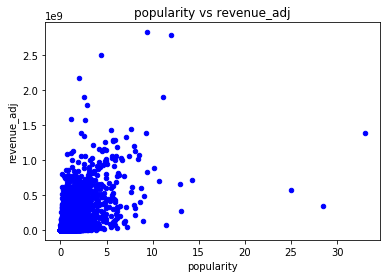

In [20]:
# now lets plot the relation between the popularity of a movie and its revenue_adj
scatterplot("popularity" , "revenue_adj" , "blue" )

> from this scatter plot we found a positive correlation between popularity and revenue .

#### whether movies with higher budget are more popular ?

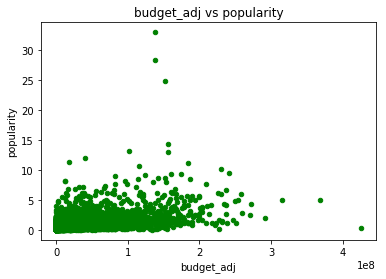

In [21]:
# lets plot a scatter plot between budget_adj and popularity
scatterplot("budget_adj" , "popularity" , "green" )

> this scatter plot also shows a positive correlation between budget of the movie and its popularity

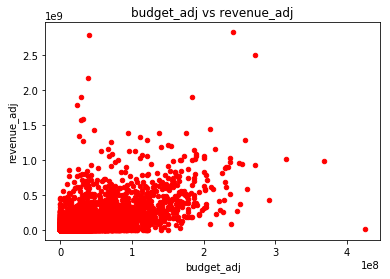

In [22]:
# lets ploty a final scatter plot between budget and revenue
scatterplot("budget_adj" , "revenue_adj" , "red" )

> another positive correlation between budget and revenue 

### now lets see how each variable ( popularity,  revenue_adj, budget_adj ) behaves by itself by creating a histogram plot for each

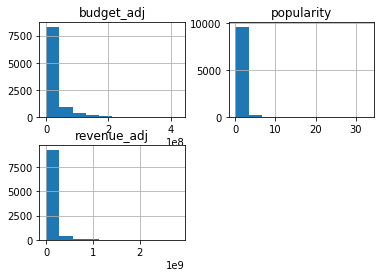

In [23]:
df.hist(column=['popularity', 'revenue_adj', 'budget_adj']);

> from above histogram we notice that all three properites are normaly distributed

<a id='conclusions'></a>
## Conclusions

> first we imported our data,  then we made a data wrangling process from cleaning to removing unwanted properties/columns whether for null values or unwanted columns.

> then we plotted some scatter plots to check the correlation between the wanted properties to find answers to our questions.

> finally we can say that there is a positive correlation between each property of the following ( popularity vs revenue_adj  &  budget_adj vs popularity & budget_adj vs revenue_adj), also with the histogram plots of each property we notice that it is normally distributed individually.
and that means that the more the budget of the movie the more its popularity and its incoming revenue
